<a href="https://colab.research.google.com/github/rkudulis/Deep-Learning-Notebooks/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
from torch import nn
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
IMAGES_PATH = "/content/drive/MyDrive/fashion/images"
STYLES_PATH = "/content/drive/MyDrive/fashion/styles"

In [15]:
images_df = pd.read_csv("/content/drive/MyDrive/fashion/images.csv")
print(images_df.shape)
images_df.head()

(44446, 2)


,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [24]:
styles_df = pd.read_csv("/content/drive/MyDrive/fashion/styles.csv", index_col=False, error_bad_lines=False)
print(styles_df.shape)
styles_df.head()

(44424, 10)


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [17]:
images = os.listdir("/content/drive/MyDrive/fashion/images")
len(images)

44441

In [18]:
images[:2]

['8813.jpg', '8804.jpg']

In [30]:
train_df, valid_df = torch.utils.data.random_split(styles_df, [30000, 14424], generator=torch.Generator().manual_seed(42))

In [25]:
images.index('15970.jpg')

39659

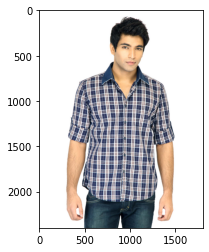

In [29]:
plt.imshow(Image.open(f"/content/drive/MyDrive/fashion/images/{images[39659]}"));

In [32]:
styles_df.iloc[0].id

15970

In [42]:
class TrainDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, indices, transforms=None):
        self.dataset = dataset
        self.indices = indices
        self.transforms = transforms

    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        path = f"/content/drive/MyDrive/fashion/images/{self.dataset.iloc[idx].id}.jpg"
        image = Image.open(path)
        if self.transforms:
            image = self.transforms(image)
        return image


In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(255)
])

In [46]:
train_dataset = TrainDataset(styles_df, train_df.indices, transforms=transform)
valid_dataset = TrainDataset(styles_df, valid_df, transforms=transform)

TypeError: ignored

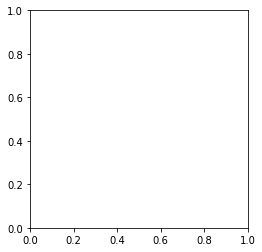

In [48]:
img = train_dataset[5]
plt.imshow(img)